In [14]:
from requests import get
from bs4 import BeautifulSoup
import re
import pandas as pd
from time import sleep
from random import randint
from time import time
from IPython.core.display import clear_output
from warnings import warn
import math
import cv2
import os
import unicodedata
import string
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
# !pip3 install colorama
from colorama import Fore
%matplotlib inline
# import colorama
from sklearn.metrics import confusion_matrix
import dateutil

In [15]:
'''
  IMPORT FROM CSV
'''
domestic, worldwide = True, False


# # path = "../../multi_thread_scraper/feature_engineering/"
# path = "../../multi_thread_scraper/data/"
# # path = "/content/gdrive/My Drive/extensive_features/test"
# if domestic:
# #   df = pd.read_csv('{}domestic_engineered_2000_adjusted.csv'.format(path))
#   df = pd.read_csv('{}full_dataset.csv'.format(path))
# else:
#   df = pd.read_csv('{}international_engineered_2000.csv'.format(path))
  
df = pd.read_csv('{}full_dataset.csv'.format(path))
df = df.drop(df.columns[0], axis=1)
df = df.replace("[]", 0)

In [ ]:
# if domestic:
#   df = df.reset_index()
#   new_office= []
#   for bo in df['dom_box_office']:
#     if bo > 0:
#       if bo <= 200000000:
#         new_office.append(bo)
#       else:
#         new_office.append(np.nan)
#     else:
#       new_office.append(np.nan)
#   df['dom_box_office'] = new_office
#   for idx, row in enumerate(df.itertuples()):
#     if row.dom_box_office > 0:
#       continue
#     else:
#       df = df.drop(idx)


In [18]:
df.shape

(5955, 16)

In [17]:
df = df.dropna()

In [19]:
df.columns

Index(['name', 'box_office', 'mpaa', 'release', 'budget', 'theatres',
       'runtime', 'sequel', 'G', 'NC-17', 'PG', 'PG-13', 'R', 'Unrated',
       'date', 'month'],
      dtype='object')

In [21]:
if domestic:
  columns = ['budget', 'runtime', 'sequel',
       'theatres', 'G', 'NC-17', 'PG', 'PG-13', 'R', 'Unrated']
  X = df[columns]
  for val in columns:
    try:
      X[val] = X[val].astype(np.double)
    except:
      print(val)
else:
  columns = ['budget', 'mpaa', 'num_theatres',
       'runtime','act_dir_recent', 'act_gross_rec',
       'dir_gross_rec',
       'star_value_recent', 'comp_high', 'comp_med', 'comp_low', 'avg_tenure',
       'total_tenure', 'sw_rec', 'prev_year_avg', 'ytd_avg', '7_day_comp',
       'prev_genre_mpaa', 'ytd_genre_mpaa', 'rec_genre_avg', 'act_gen_rec',
       'sequel_last', 'seasonality',
       'rec_studio', 'rec_spec_eff', 'transmedia']
  X = df[columns]
  for val in columns:
    try:
      X[val] = X[val].astype(np.double)
    except:
      print(val)
    
X.tail()

c:\users\brian\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,budget,runtime,sequel,theatres,G,NC-17,PG,PG-13,R,Unrated
10484,10000000.0,92.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
10486,2000000.0,97.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
10487,17000000.0,105.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0
10490,300000.0,90.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0
10497,250000.0,78.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [23]:
y_train_regression = df['box_office']
y_train_regression= y_train_regression.astype(np.float)

In [ ]:
len(y_train_regression)

In [ ]:
# X = X.fillna(X.mean())
# X = X.dropna()

In [ ]:
y_train_regression.head()

In [24]:
y = []
if domestic:
  for value in y_train_regression:
      value = float(value)
  #     print (type(value))
      if value <= 1000000:
  #         y.append(0)
  #     elif value > 1000000 and value <= 10000000:
          y.append(0)
      elif value > 1000000 and value <= 10000000:
          y.append(1)
      elif value > 10000000 and value <= 20000000:
          y.append(2)
      elif value > 20000000 and value <= 40000000:
          y.append(3)
      elif value > 40000000 and value <= 65000000:
          y.append(4)
      elif value > 65000000 and value <= 100000000:
          y.append(5)
      elif value > 100000000 and value <= 150000000:
          y.append(6)
      elif value > 150000000 and value <= 200000000:
          y.append(7)
      elif value > 200000000:
          y.append(8)
else:
    for value in y_train_regression:
      value = float(value)
  #     print (type(value))
      if value <= 10000000:
          y.append(0)
      elif value > 10000000 and value <= 50000000:
          y.append(1)
      elif value > 50000000 and value <= 100000000:
          y.append(2)
      elif value > 100000000 and value <= 200000000:
          y.append(3)
      elif value > 200000000 and value <= 400000000:
          y.append(4)
      elif value > 400000000 and value <= 600000000:
          y.append(5)
      elif value > 600000000 and value <= 800000000:
          y.append(6)
      elif value > 800000000 and value <= 1000000000:
          y.append(7)
      elif value > 1000000000:
          y.append(8)
      else:
        print(value)
print(set(y))

{0, 1, 2, 3, 4, 5, 6, 7, 8}


In [25]:
print("CLASSES")
print(f"0: {y.count(0)}")
print(f"1: {y.count(1)}")
print(f"2: {y.count(2)}")
print(f"3: {y.count(3)}")
print(f"4: {y.count(4)}")
print(f"5: {y.count(5)}")
print(f"6: {y.count(6)}")
print(f"7: {y.count(7)}")
print(f"8: {y.count(8)}")

# print("BUDGETS")
# budgets = []
# for val in X['budget']:
#   budgets.append(val)
# budgets.sort(reverse=True)

CLASSES
0: 905
1: 1269
2: 850
3: 1042
4: 733
5: 460
6: 351
7: 148
8: 197


In [26]:
len(y)

5955

In [27]:
import numpy as np
X_df = X
X = np.array(X)
y = np.array(y)

In [28]:
len(X)

5955

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# SCALE DATASET
scaler = StandardScaler()
scaler.fit(X)
x_temp = scaler.transform(X)

# SPLIT INTO TRAIN/VALID/TEST
X_train, X_test, y_train, y_test = train_test_split(x_temp, y, test_size = 0.2, random_state = 0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size= 0.1, random_state = 0)

In [30]:
import torch
import torch.utils.data
from torch.autograd import Variable

In [31]:
'''
  Create tensors for our train/valid/test sets
  Need variable to accumulate gradients. 
  First we create tensor, then we will create variable 
'''
# Numpy to Tensor Conversion (Train Set)
X_train = torch.from_numpy(X_train)
y_train = torch.from_numpy(y_train)

# Numpy to Tensor Conversion (Valid Set)
X_valid = torch.from_numpy(X_valid)
y_valid = torch.from_numpy(y_valid)

# Numpy to Tensor Conversion (Test Set)
X_test = torch.from_numpy(X_test)
y_test = torch.from_numpy(y_test)

In [32]:
set(y)

{0, 1, 2, 3, 4, 5, 6, 7, 8}

In [33]:
# Make torch datasets from train / valid / test sets
train = torch.utils.data.TensorDataset(X_train,y_train)
valid = torch.utils.data.TensorDataset(X_valid,y_valid)
test = torch.utils.data.TensorDataset(X_test,y_test)

# Create train / valid / test data loaders
train_loader = torch.utils.data.DataLoader(train, batch_size = 64, shuffle = True)
valid_loader = torch.utils.data.DataLoader(valid, batch_size = 64, shuffle = True)
test_loader = torch.utils.data.DataLoader(test, batch_size = 64, shuffle = True)

In [34]:
import torch.nn as nn
import torch.nn.functional as F
import torch.nn.modules.batchnorm as bn

In [35]:
class ANN(nn.Module):
    def __init__(self, input_dim = 39, output_dim = 9, dropout_rate = .2, act = 'lrelu'):
        super(ANN, self).__init__()
    
        self.input_dim = input_dim
        self.act = act
        # Input Layer (2) -> 784
        self.fc1 = nn.Linear(input_dim, 32)
        # 256 -> 128
        self.fc2 = nn.Linear(32, 16)
        # 128 -> 128
        self.fc3 = nn.Linear(16, 8)

        self.fc4 = nn.Linear(8, 4)
        # 32 -> output layer(10)
        self.output_layer = nn.Linear(4,9)
        # Dropout Layer (20%) to reduce overfitting
        self.dropout = nn.Dropout(dropout_rate)
        #input features
        self.batchnorm1 = nn.BatchNorm1d(input_dim)
        
        self.batchnorm2 = nn.BatchNorm1d(64)
    
    
    # Feed Forward Function
    def forward(self, x):
      if self.act == 'lrelu':
        x = F.leaky_relu(self.fc1(x))
      #         x = self.dropout(x)
        x = F.leaky_relu(self.fc2(x))
        x = F.leaky_relu(self.fc3(x))
        x = self.batchnorm2(x)
        # Add dropout layer
#         x = self.dropout(x)
        x = F.leaky_relu(self.fc4(x))
        x = F.leaky_relu(self.fc5(x))
      #         x = self.dropout(x)
        x = F.leaky_relu(self.fc6(x))
        x = F.leaky_relu(self.fc7(x))
        x = self.dropout(x)
        # Don't add any ReLU activation function to Last Output Layer
        x = self.output_layer(x)
      elif self.act == 'relu':
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
#         x = self.batchnorm2(x)
        # Add dropout layer
        x = self.dropout(x)
        x = F.relu(self.fc4(x))
        x = self.dropout(x)
        # Don't add any ReLU activation function to Last Output Layer
        x = self.output_layer(x)
      elif self.act == 'elu':
        x = F.elu(self.fc1(x))
      #         x = self.dropout(x)
        x = F.elu(self.fc2(x))
        x = F.elu(self.fc3(x))
        x = self.batchnorm2(x)
        # Add dropout layer
        x = self.dropout(x)
        x = F.elu(self.fc4(x))
        x = F.elu(self.fc5(x))
      #         x = self.dropout(x)
        x = F.elu(self.fc6(x))
        x = F.elu(self.fc7(x))
        x = self.dropout(x)
        # Don't add any ReLU activation function to Last Output Layer
        x = self.output_layer(x)
      elif self.act == 'selu':
        x = F.selu(self.fc1(x))
      #         x = self.dropout(x)
        x = F.selu(self.fc2(x))
        x = F.selu(self.fc3(x))
        x = self.batchnorm2(x)
        # Add dropout layer
        x = self.dropout(x)
        x = F.selu(self.fc4(x))
        x = F.selu(self.fc5(x))
      #         x = self.dropout(x)
        x = F.selu(self.fc6(x))
        x = F.selu(self.fc7(x))
        x = self.dropout(x)
        # Don't add any ReLU activation function to Last Output Layer
        x = self.output_layer(x)
      elif self.act == 'celu':
        x = F.celu(self.fc1(x))
      #         x = self.dropout(x)
        x = F.celu(self.fc2(x))
        x = F.celu(self.fc3(x))
        x = self.batchnorm2(x)
        # Add dropout layer
        x = self.dropout(x)
        x = F.celu(self.fc4(x))
        x = F.celu(self.fc5(x))
      #         x = self.dropout(x)
        x = F.celu(self.fc6(x))
        x = F.celu(self.fc7(x))
        x = self.dropout(x)
        # Don't add any ReLU activation function to Last Output Layer
        x = self.output_layer(x)
        # Return the created model
      return x

In [36]:
# Create the Neural Network Model
model = ANN(input_dim = 10, output_dim = 9, act='relu')
# Print its architecture
print(model)

ANN(
  (fc1): Linear(in_features=10, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=8, bias=True)
  (fc4): Linear(in_features=8, out_features=4, bias=True)
  (output_layer): Linear(in_features=4, out_features=9, bias=True)
  (dropout): Dropout(p=0.2)
  (batchnorm1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [37]:
import torch.optim as optim
# from torch.optim import nadam
# from optim import nadam
# Specify Loss Function
loss_fn = nn.CrossEntropyLoss()
# loss_fn = nn.MSELoss()


# Specify Optimizer
optimizer = optim.Adam(model.parameters(), lr=.001)

Epoch: 91
Training Loss: 5395.7193	 Val Loss: 581.2186
Training Acc: 37.00	 Val Acc: 40.00


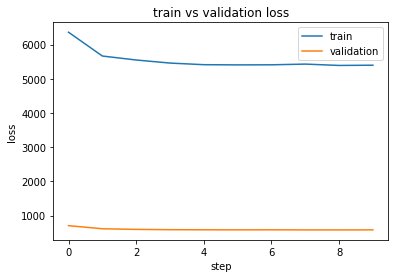

In [38]:
# Num Epochs
epochs =100

# initialize tracker for minimum validation loss
valid_loss_min = np.Inf # set initial "min" to infinity

# Some lists to keep track of loss and accuracy during each epoch
epoch_list = []
train_loss_list = []
val_loss_list = []
train_acc_list = []
val_acc_list = []


t_loss = []
v_loss = []
plt.figure()
#define plot function
def plot_function():
    t_loss.append(train_loss)
    v_loss.append(val_loss)
    plt.plot(t_loss, label="Train")
    plt.plot(v_loss, label="Valid")
    plt.title('train vs validation loss')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.ylabel('loss')
    plt.xlabel('step')
    plt.show()
    clear_output(wait=True)
# Start epochs
for epoch in range(epochs):
    # monitor training loss
    train_loss = 0.0
    val_loss = 0.0
    
    ###################
    # train the model #
    ###################
    # Set the training mode ON -> Activate Dropout Layers
    model.train() # prepare model for training
    # Calculate Accuracy         
    correct = 0
    total = 0
    
    # Load Train Tuples with Labels(Targets)
    for data, target in train_loader:
        
        # Convert our feature and labels to Variables to accumulate Gradients
        data = Variable(data).float()
        target = Variable(target).type(torch.LongTensor)
        
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        
        # Calculate Training Accuracy 
        predicted = torch.max(output.data, 1)[1]        
        # Total number of labels
        total += len(target)
        # Total correct predictions
        correct += (predicted == target).sum()
        
        # calculate the loss
#         loss = loss_fn(output, target)
        loss = torch.sqrt(loss_fn(output, target))
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
    
    # calculate average training loss over an epoch
    train_loss = np.mean(train_loss)
    
    # Avg Accuracy
    train_accuracy = 100 * correct / float(total)
    
    # Put them in their list
    train_acc_list.append(train_accuracy)
    train_loss_list.append(train_loss)
    
        
    # Implement Validation like K-fold Cross-validation 
    # Set Evaluation Mode ON -> Turn Off Dropout
    model.eval() # Required for Evaluation/Test

    # Calculate Test/Validation Accuracy         
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in valid_loader:

            # Convert our images and labels to Variables to accumulate Gradients
            data = Variable(data).float()
            target = Variable(target).type(torch.LongTensor)
            
            # Predict Output
            output = model(data)

            # Calculate Loss
#             loss = loss_fn(output, target)
            loss = torch.sqrt(loss_fn(output, target))
            val_loss += loss.item()*data.size(0)
            # Get predictions from the maximum value
            predicted = torch.max(output.data, 1)[1]

            # Total number of labels
            total += len(target)

            # Total correct predictions
            correct += (predicted == target).sum()
    
    # calculate average training loss and accuracy over an epoch
    val_loss = np.mean(val_loss)
    val_accuracy = 100 * correct/ float(total)
    
    # Put them in their list
    val_acc_list.append(val_accuracy)
    val_loss_list.append(val_loss)

    
    """
        PLOT EPOCHS IN GRAPH
    """
    if epoch % 10 == 0:
#       if val_loss <= valid_loss_min:
#           print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
#           valid_loss_min,
#           val_loss))
#           torch.save(model.state_dict(), 'model.pt')
#           valid_loss_min = val_loss
      print("Epoch: {}".format(epoch+1))
      print("Training Loss: {:.4f}\t Val Loss: {:.4f}".format(
        train_loss,
        val_loss
      ))
      print("Training Acc: {:.2f}\t Val Acc: {:.2f}".format(
        train_accuracy,
        val_accuracy
      ))
      plot_function()

    # save model if validation loss has decreased
#     path="/content/gdrive/My Drive/extensive_features/test"

#     clear_output(wait=True)
    # Move to next epoch
    epoch_list.append(epoch + 1)


In [39]:
test_loss = 0
accuracy_test = 0
test_total = 0
correct = 0

y_true = []
y_pred = []

for data, target in test_loader:
  # Convert our tuples and labels to Variables to accumulate Gradients
  data = Variable(data).float()
  target = Variable(target).type(torch.LongTensor)

  # Predict Output
  output = model(data)

  # Calculate Loss
  loss = loss_fn(output, target)
  test_loss += loss.item()*data.size(0)
  # Get predictions from the maximum value
  predicted = torch.max(output.data, 1)[1]
  for val in predicted:
    y_pred.append(val)
#   y_pred.append(predicted)
  for val in target:
    y_true.append(val)

  # Total number of labels
  test_total += len(target)

  # Total correct predictions
  correct += (predicted == target).sum()
#   print("{}:{}".format(predicted, target))
  

test_loss = np.mean(test_loss)
accuracy_test = 100 * correct/ float(test_total)
print('Test loss', test_loss)
print('Test Accuracy', accuracy_test)

Test loss 1839.356204032898
Test Accuracy tensor(36)


In [ ]:
confusion_matrix(y_true, y_pred)

In [ ]:
def grid_search():
  def get_test_accuracy(lr, dropout_rate, batch_size, max_epoch, act, opt, decay, ams_grad):
        train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = True)
        valid_loader = torch.utils.data.DataLoader(valid, batch_size = batch_size, shuffle = True)
        test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = True)
        model = ANN(input_dim = 24, output_dim = 10, dropout_rate = dropout_rate, act=act)
        loss_fn = nn.CrossEntropyLoss()
        # Specify Optimizer

        if opt == 'Adam':
          optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=decay, amsgrad=ams_grad)
        elif opt == 'Adamax':
          optimizer = optim.Adamax(model.parameters(), lr=lr, weight_decay=decay)
        elif opt == 'LBFGS':
          optimizer = optim.LBFGS(model.parameters(), lr=lr)
        # initialize tracker for minimum validation loss
        epochs = max_epoch

        # initialize tracker for minimum validation loss
        valid_loss_min = np.Inf # set initial "min" to infinity

        # Some lists to keep track of loss and accuracy during each epoch
        epoch_list = []
        train_loss_list = []
        val_loss_list = []
        train_acc_list = []
        val_acc_list = []

        for epoch in range(epochs):
          train_loss = 0.0
          val_loss = 0.0

          ###################
          # train the model #
          ###################
          # Set the training mode ON -> Activate Dropout Layers
          model.train() # prepare model for training
          # Calculate Accuracy         
          correct = 0
          total = 0
          for data, target in train_loader:

            # Convert our feature and labels to Variables to accumulate Gradients
            data = Variable(data).float()
            target = Variable(target).type(torch.LongTensor)

            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)

            # Calculate Training Accuracy 
            predicted = torch.max(output.data, 1)[1]        
            # Total number of labels
            total += len(target)
            # Total correct predictions
            correct += (predicted == target).sum()

            # calculate the loss
            loss = loss_fn(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update running training loss
            train_loss += loss.item()*data.size(0)

          train_loss = np.mean(train_loss)

          # Avg Accuracy
          train_accuracy = 100 * correct / float(total)

          # Put them in their list
          train_acc_list.append(train_accuracy)
          train_loss_list.append(train_loss)


          # Implement Validation like K-fold Cross-validation 
          # Set Evaluation Mode ON -> Turn Off Dropout
          model.eval() # Required for Evaluation/Test

          # Calculate Test/Validation Accuracy         
          correct = 0
          total = 0
          with torch.no_grad():
              for data, target in valid_loader:

                  # Convert our images and labels to Variables to accumulate Gradients
                  data = Variable(data).float()
                  target = Variable(target).type(torch.LongTensor)

                  # Predict Output
                  output = model(data)

                  # Calculate Loss
                  loss = loss_fn(output, target)
                  val_loss += loss.item()*data.size(0)
                  # Get predictions from the maximum value
                  predicted = torch.max(output.data, 1)[1]

                  # Total number of labels
                  total += len(target)

                  # Total correct predictions
                  correct += (predicted == target).sum()

          # calculate average training loss and accuracy over an epoch
          val_loss = np.mean(val_loss)
          val_accuracy = 100 * correct/ float(total)

          # Put them in their list
          val_acc_list.append(val_accuracy)
          val_loss_list.append(val_loss)


    #       GRAB TEST METRICS
          test_loss = 0
          accuracy_test = 0
          test_total = 0
          correct = 0
          for data, target in test_loader:
            # Convert our tuples and labels to Variables to accumulate Gradients
            data = Variable(data).float()
            target = Variable(target).type(torch.LongTensor)

            # Predict Output
            output = model(data)

            # Calculate Loss
            loss = loss_fn(output, target)
            test_loss += loss.item()*data.size(0)
            # Get predictions from the maximum value
            predicted = torch.max(output.data, 1)[1]

            # Total number of labels
            test_total += len(target)

            # Total correct predictions
            correct += (predicted == target).sum()

          test_loss = np.mean(test_loss)
          accuracy_test = 100 * correct/ float(test_total)

          return accuracy_test

  lrs = [.1, .01,.001, .0001]
  activations = ['relu', 'elu', 'lrelu', 'selu', 'celu']
  dropout_rates = [.2, .3, .5, .7]
  batch_sizes = [16, 32, 64, 128]
  max_epochs = list(range(10, 30))
  decay_rates = [0, .1, .001, .0001]
  ams_grad = [True, False]
  optimizers = ['Adam', 'Adamax']

  test_accuracy_max = 0
  best_hyperparameters = {}

    # 1. process the model with the chosen parameters
    # get_test_accuracy(lr, activation, dropout_rate, batch
    #_size, max_poch, optimizer) -> test_accuracy
    # 2. keep track of the test accuracy
    # 3. if test accuracy greater than previous max
  counter = 0

  for lr in lrs:
  #   print(f'lr {lr}')
    for act in activations:
  #     print(f'activation {act}')
      for dropout_rate in dropout_rates:
  #       print(f'dropout_rate {dropout_rate}')
        for batch_size in batch_sizes:
  #         print(f'batch_size {batch_size}')
          for max_epoch in max_epochs:
  #           print(f'max_epoch {max_epoch}')
            for optimizer in optimizers:
              if optimizer == 'Adam':
  #               print(f'optimizer {optimizer}')
                for decay in decay_rates:
  #                 print(f'decay{decay}')
                  for grad in ams_grad:
  #                   print(f'grad: {grad}')
                    counter += 1
                    accuracy_test = get_test_accuracy(lr, dropout_rate, batch_size, max_epoch, act, optimizer, decay, ams_grad)
                    print(f'Counter: {counter}')
                    print(Fore.GREEN + "Best Accuracy: {}".format(test_accuracy_max))
                    print(Fore.RED + "Accuracy: {}".format(accuracy_test))
                    clear_output(wait=True)
                    if accuracy_test > test_accuracy_max:
                      print(Fore.GREEN + "Best Accuracy: {}".format(accuracy_test))
                      clear_output(wait=True)
                      test_accuracy_max = accuracy_test
                      best_hyperparameters['lr'] = lr
                      best_hyperparameters['activation'] = act
                      best_hyperparameters['dropout_rate'] = dropout_rate
                      best_hyperparameters['batch_size'] = batch_size
                      best_hyperparameters['max_epoch'] = max_epoch
                      best_hyperparameters['optimizer'] = optimizer
                      best_hyperparameters['decay'] = decay
                      best_hyperparameters['ams_grad'] = grad
              elif optimizer == 'Adamax':
  #               print(f'optimizer {optimizer}')
                for decay in decay_rates:
  #                 print(f'decay{decay}')
                  counter += 1
                  accuracy_test = get_test_accuracy(lr, dropout_rate, batch_size, max_epoch, act, optimizer, decay, 'null')
                  print(f'Counter: {counter}')
                  print(Fore.GREEN + "Best Accuracy: {}".format(test_accuracy_max))
                  print(Fore.RED + "Accuracy: {}".format(accuracy_test))
                  clear_output(wait=True)
                  if accuracy_test > test_accuracy_max:
                    print(Fore.GREEN + "Best Accuracy: {}".format(accuracy_test))
                    clear_output(wait=True)
                    test_accuracy_max = accuracy_test
                    best_hyperparameters['lr'] = lr
                    best_hyperparameters['activation'] = act
                    best_hyperparameters['dropout_rate'] = dropout_rate
                    best_hyperparameters['batch_size'] = batch_size
                    best_hyperparameters['max_epoch'] = max_epoch
                    best_hyperparameters['optimizer'] = optimizer
                    best_hyperparameters['decay'] = decay
                    best_hyperparameters['ams_grad'] = 'null'
              elif optimizer == 'LBFGS':
  #               print(f'optimizer {optimizer}')
                counter += 1
                accuracy_test = get_test_accuracy(lr, dropout_rate, batch_size, max_epoch, act, optimizer, 'null', 'null')
                print(f'Counter: {counter}')
                print(Fore.GREEN + "Best Accuracy: {}".format(test_accuracy_max))
                print(Fore.RED + "Accuracy: {}".format(accuracy_test))
                clear_output(wait=True)
                if accuracy_test > test_accuracy_max:
                  print(Fore.GREEN + "Best Accuracy: {}".format(accuracy_test))
                  clear_output(wait=True)
                  test_accuracy_max = accuracy_test
                  best_hyperparameters['lr'] = lr
                  best_hyperparameters['activation'] = act
                  best_hyperparameters['dropout_rate'] = dropout_rate
                  best_hyperparameters['batch_size'] = batch_size
                  best_hyperparameters['max_epoch'] = max_epoch
                  best_hyperparameters['optimizer'] = optimizer
                  best_hyperparameters['decay'] = 'null'
                  best_hyperparameters['ams_grad'] = 'null'
                  # keep track of the hyperparameters in a dict
                  # best_hyperparams['lr']
                  # test_accuracy_max = test_accuracy

grid_search()

In [ ]:
print(f'Best Accuracy: {test_accuracy_max}')
print(f'{best_hyperparameters}')
test_accuracy_max = 0
best_hyperparameters = {}

In [ ]:
# torch.load("model.pt")


**Kfold**

In [41]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
x_temp = scaler.transform(X)



# X_train, X_test, y_train, y_test = train_test_split(x_temp, y, test_size = 0.2, random_state = 0)

from sklearn.model_selection import KFold
kfolds = KFold(10, False).split(x_temp)
for _, (X_index, y_index) in enumerate(kfolds):
    '''
      Create tensors for our train / valid / test sets. 
      Need variable to accumulate gradients. 
      First we create tensor, then we will create variable 
    '''
#     model = ANN(input_dim = 24, output_dim = 9, act='relu')
    X_train = X[X_index]
    y_train = y[X_index]
    X_valid = X[y_index]
    y_valid = y[y_index]
    X_train = torch.from_numpy(X_train)
    y_train = torch.from_numpy(y_train)

    # Numpy to Tensor Conversion (Test Set)
    X_valid = torch.from_numpy(X_valid)
    y_valid = torch.from_numpy(y_valid)
    # Make torch datasets from train and test sets
    train = torch.utils.data.TensorDataset(X_train,y_train)
    valid = torch.utils.data.TensorDataset(X_valid,y_valid)

    # Create train and test data loaders
    train_loader = torch.utils.data.DataLoader(train, batch_size = 64, shuffle = True)
    valid_loader = torch.utils.data.DataLoader(valid, batch_size = 64, shuffle = True)
    # Define num epochs
    epochs = 101

    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf # set initial "min" to infinity

    # Some lists to keep track of loss and accuracy during each epoch
    epoch_list = []
    train_loss_list = []
    val_loss_list = []
    train_acc_list = []
    val_acc_list = []

    # Start epochs
    for epoch in range(epochs):
        # monitor training loss
        train_loss = 0.0
        val_loss = 0.0

        ###################
        # train the model #
        ###################
        # Set the training mode ON -> Activate Dropout Layers
        model.train() # prepare model for training
        # Calculate Accuracy         
        correct = 0
        total = 0

        # Load Train Tuples with Labels(Targets)
        for data, target in train_loader:

            # Convert our feature and labels to Variables to accumulate Gradients
            data = Variable(data).float()
            target = Variable(target).type(torch.LongTensor)

            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)

            # Calculate Training Accuracy 
            predicted = torch.max(output.data, 1)[1]        
            # Total number of labels
            total += len(target)
            # Total correct predictions
            correct += (predicted == target).sum()

            # calculate the loss
            loss = loss_fn(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update running training loss
            train_loss += loss.item()*data.size(0)

        # calculate average training loss over an epoch
        train_loss = np.mean(train_loss)

        # Avg Accuracy
        train_accuracy = 100 * correct / float(total)

        # Put them in their list
        train_acc_list.append(train_accuracy)
        train_loss_list.append(train_loss)


        # Implement Validation like K-fold Cross-validation 
        # Set Evaluation Mode ON -> Turn Off Dropout
        model.eval() # Required for Evaluation/Test

        # Calculate Test/Validation Accuracy         
        correct = 0
        total = 0
        with torch.no_grad():
            for data, target in valid_loader:

                # Convert our features and labels to Variables to accumulate Gradients
                data = Variable(data).float()
                target = Variable(target).type(torch.LongTensor)

                # Predict Output
                output = model(data)

                # Calculate Loss
                loss = loss_fn(output, target)
                val_loss += loss.item()*data.size(0)
                # Get predictions from the maximum value
                predicted = torch.max(output.data, 1)[1]

                # Total number of labels
                total += len(target)

                # Total correct predictions
                correct += (predicted == target).sum()

        # calculate average training loss and accuracy over an epoch
        val_loss = np.mean(val_loss)
        val_accuracy = 100 * correct/ float(total)

        # Put them in their list
        val_acc_list.append(val_accuracy)
        val_loss_list.append(val_loss)
        if epoch % 50 == 0:
            # Print the Epoch and Training Loss Details with Validation Accuracy   
            print('Epoch: {} \tTraining Loss: {:.4f}\t Val. loss: {:.4f} \n Train Acc: {:.2f}\t Val Acc: {:.2f}'.format(
                epoch+1, 
                train_loss,
                val_loss,
                train_accuracy,
                val_accuracy
                ))
            # save model if validation loss has decreased
            if val_loss <= valid_loss_min:
#                 print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
#                 valid_loss_min,
#                 val_loss))
                torch.save(model.state_dict(), 'model.pt')
                valid_loss_min = val_loss
            # Move to next epoch
            epoch_list.append(epoch + 1)

Epoch: 1 	Training Loss: 10364.2341	 Val. loss: 1937.9811 
 Train Acc: 23.00	 Val Acc: 0.00
Epoch: 51 	Training Loss: 9721.2144	 Val. loss: 3089.8762 
 Train Acc: 23.00	 Val Acc: 0.00
Epoch: 101 	Training Loss: 9699.8065	 Val. loss: 3697.1359 
 Train Acc: 23.00	 Val Acc: 0.00
Epoch: 1 	Training Loss: 11698.9174	 Val. loss: 1652.6035 
 Train Acc: 23.00	 Val Acc: 0.00
Epoch: 51 	Training Loss: 10137.1855	 Val. loss: 2658.2072 
 Train Acc: 23.00	 Val Acc: 0.00
Epoch: 101 	Training Loss: 10099.4275	 Val. loss: 3400.0087 
 Train Acc: 23.00	 Val Acc: 0.00
Epoch: 1 	Training Loss: 12140.0410	 Val. loss: 1310.8171 
 Train Acc: 23.00	 Val Acc: 0.00
Epoch: 51 	Training Loss: 10485.4195	 Val. loss: 2132.1900 
 Train Acc: 23.00	 Val Acc: 0.00
Epoch: 101 	Training Loss: 10484.6630	 Val. loss: 2166.9422 
 Train Acc: 23.00	 Val Acc: 0.00
Epoch: 1 	Training Loss: 11395.8436	 Val. loss: 1200.2266 
 Train Acc: 23.00	 Val Acc: 0.00
Epoch: 51 	Training Loss: 10870.5562	 Val. loss: 1347.2920 
 Train Acc: 2

In [42]:
test_loss = 0
accuracy_test = 0
test_total = 0
correct = 0
for data, target in test_loader:
  # Convert our features and labels to Variables to accumulate Gradients
  data = Variable(data).float()
  target = Variable(target).type(torch.LongTensor)

  # Predict Output
  output = model(data)

  # Calculate Loss
  loss = loss_fn(output, target)
  test_loss += loss.item()*data.size(0)
  # Get predictions from the maximum value
  predicted = torch.max(output.data, 1)[1]

  # Total number of labels
  test_total += len(target)

  # Total correct predictions
  correct += (predicted == target).sum()
 
test_loss = np.mean(test_loss)
accuracy_test = 100 * correct/ float(test_total)
print('Test loss', test_loss)
print('Test Accuracy', accuracy_test)

Test loss 2457.5613231658936
Test Accuracy tensor(20)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)

In [ ]:
clf.fit(X_train, y_train)  

#RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.metrics import accuracy_score
predict = clf.predict(X_test)
accuracy_score(y_test, predict)

In [ ]:
importances = clf.feature_importances_

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)

(pd.Series(clf.feature_importances_, index=X_df.columns)
   .nlargest(24)
   .plot(kind='barh'))  

SUPPORT VECTOR MACHINE

In [ ]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(x_temp, y)

In [ ]:
predict = clf.predict(x_temp)
accuracy_score(y, predict)

XGBOOST CLASSIFIER

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model = XGBClassifier(boosting_type='gbdt')
model.fit(X_train, y_train)
predict = model.predict(X_test)

In [ ]:
accuracy_score(y_test, predict)

In [ ]:
confusion_matrix(y_test, predict)

LITE GBM

In [ ]:
import lightgbm as lgb
model = lgb.LGBMClassifier(boosting_type='gbdt')
model.fit(X_train, y_train)
predict = model.predict(X_test)
accuracy_score(y_test, predict)

In [ ]:
confusion_matrix(y_test, predict)